# seaborn: 
- statistical data visualization. 
- Seaborn is a Python data visualization library based on matplotlib. 
- It provides a high-level interface for drawing attractive and informative statistical graphics.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns

#%matplotlib inline
#To switch to seaborn defaults, simply call the set() function.
sns.set()

df_test = pd.read_csv("task_dataset.csv")

In [3]:
print('The shape of the dataset is ' + str(df_test.shape))
df_test.head()

The shape of the dataset is (150, 4)


,Unnamed: 0,x1,x2,y
0,0,-1.682231,7.810350,0.0
1,1,-7.200878,9.754777,0.0
2,2,-6.473791,10.441019,0.0
3,3,-5.981745,8.025655,0.0
4,4,-4.521350,9.109850,0.0


In [5]:
feature_names = ['x1', 'x2']
X = df_test[feature_names]
y = df_test['y']

In [6]:
X.head()

,x1,x2
0,-1.682231,7.810350
1,-7.200878,9.754777
2,-6.473791,10.441019
3,-5.981745,8.025655
4,-4.521350,9.109850


In [7]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: y, dtype: float64

C:\Users\ChathuraSilva\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

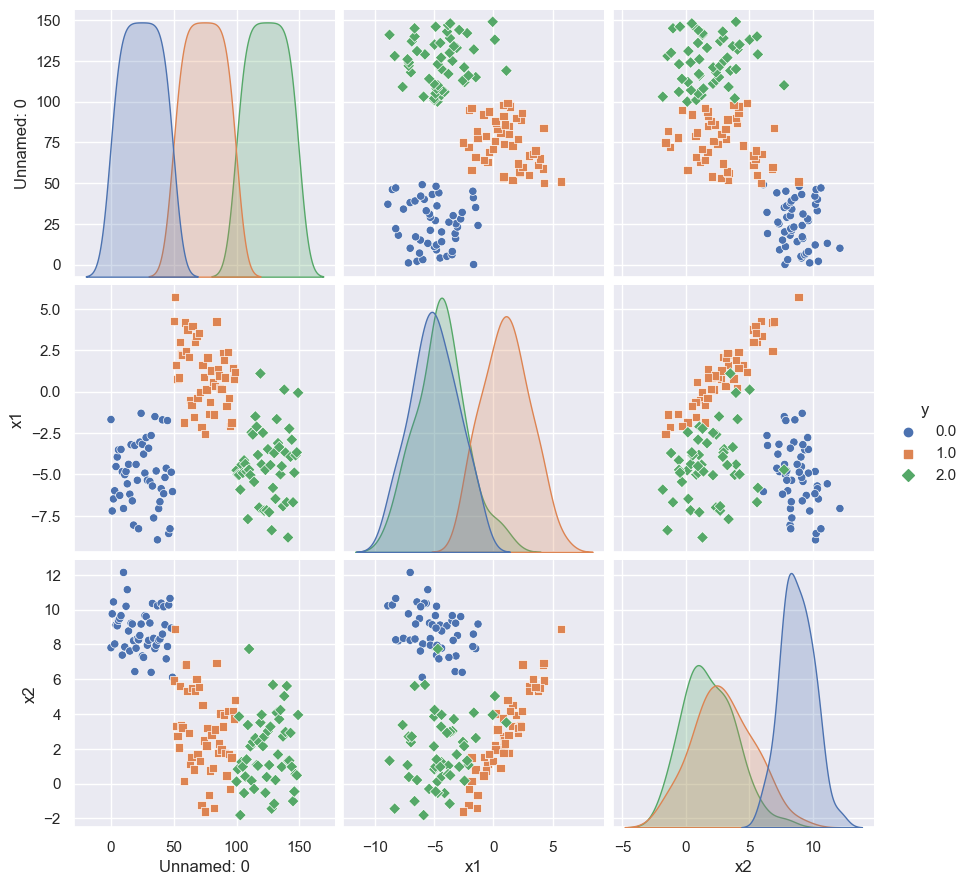

In [15]:
# View the relationships between variables; color code by species type
di = {0.0: '0.0', 1.0: '1.0',2.0:'2.0'} # dictionary

plt.figure()
sns.pairplot(df_test.replace({'y': di}), hue = "y", size=3, markers=["o", "s", "D"])
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)

print(f'training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples')

training set size: 120 samples 
test set size: 30 samples


In [25]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train = scaler.fit_transform(X_train) #the scaler is fitted to the training set and then transformed
X_test = scaler.transform(X_test)       #the scaler is applied to the test set

In [32]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 4)
knn_classifier = KNeighborsClassifier(n_neighbors=4)

# Fitting the model
knn_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = knn_classifier.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 1, 11,  1],
       [ 1,  0,  5]], dtype=int64)

In [34]:
from sklearn.metrics import  accuracy_score

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the kNN classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of the kNN classifier is equal 90.0 %.


In [36]:
# creating list of K for KNN
k_list = list(range(1,50))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

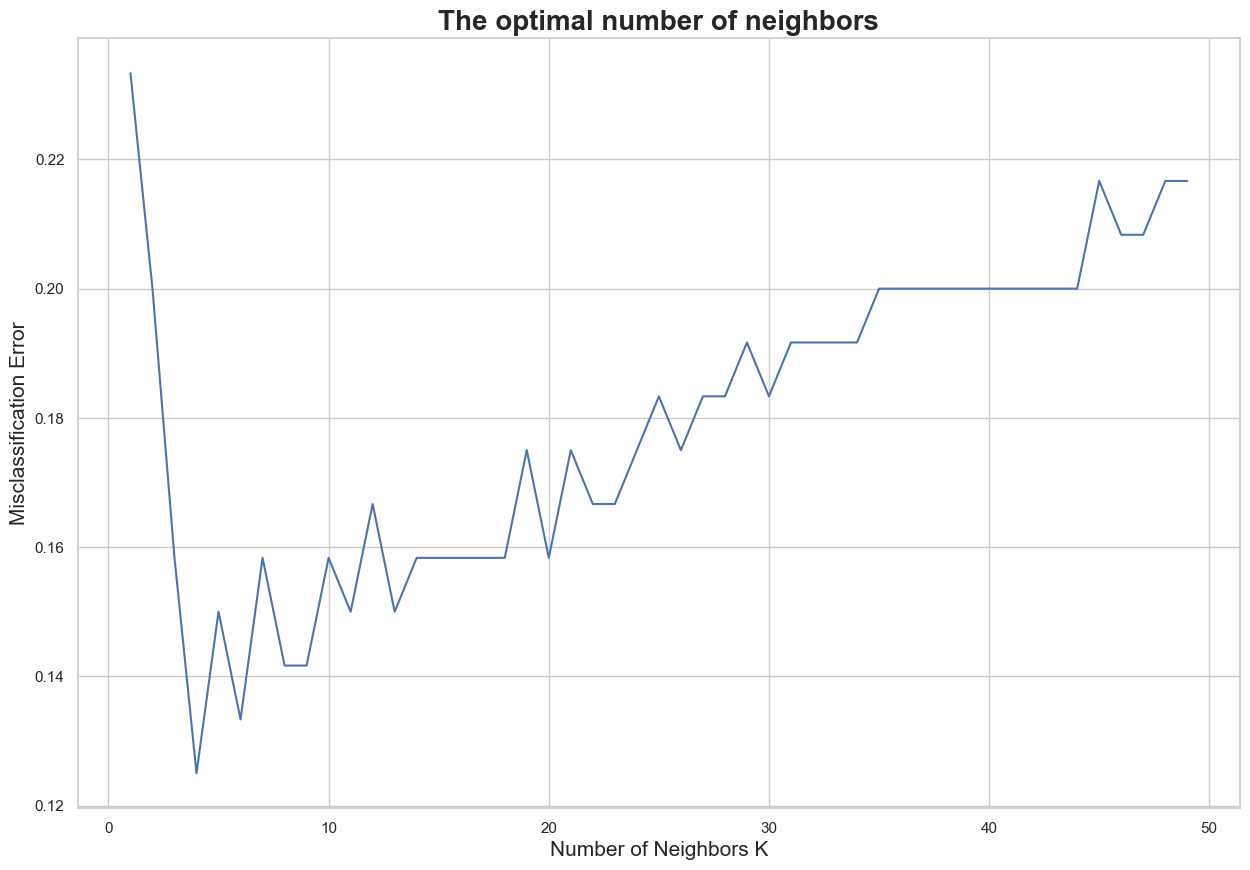

In [37]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [38]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 4.
